In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
num_of_data = 515345
num_of_dim = 90
num_of_party = 3
num_of_sample = 1000
num_of_center = 10

In [35]:
def kmeans_comm(n_data, n_dim):
    return n_data * n_dim

def uniform_comm(n_size, n_party):
    return n_size * n_party

def coreset_comm(n_size, n_party):
    return n_party + n_size * (2 + 2 * n_party)

def uniform_kmeans_comm(n_size, n_party, n_dim):
    return uniform_comm(n_size, n_party) + kmeans_comm(n_size, n_dim)

def coreset_kmeans_comm(n_size, n_party, n_dim):
    return coreset_comm(n_size, n_party) + kmeans_comm(n_size, n_dim)

def distkmeans_comm(n_data, n_party, n_dim, n_center):
    return n_dim * n_center + n_data * n_party

def uniform_distkmeans_comm(n_size, n_party, n_dim, n_center):
    return uniform_comm(n_size, n_party) + distkmeans_comm(n_size, n_party, n_dim, n_center)

def coreset_distkmeans_comm(n_size, n_party, n_dim, n_center):
    return coreset_comm(n_size, n_party) + distkmeans_comm(n_size, n_party, n_dim, n_center)

In [41]:
def box_plot(data, ax, labels, edge_color, fill_color):
    bp = ax.boxplot(data, labels = labels, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

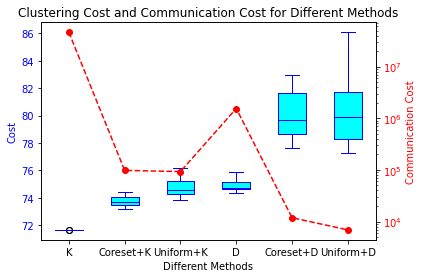

In [53]:
a = np.load("./res/kmeans-res/kmeans-10c.npy")
b = np.load("./res/kmeans-res/kmeans-coreset-10c1000s.npy")
c = np.load("./res/kmeans-res/kmeans-uniform-10c1000s.npy")
d = np.load("./res/kmeans-res/distkmeans-10c.npy")
e = np.load("./res/kmeans-res/distkmeans-coreset-10c1000s.npy")
f = np.load("./res/kmeans-res/distkmeans-uniform-10c1000s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','Coreset+K','Uniform+K','D','Coreset+D','Uniform+D']

fig, ax1 = plt.subplots()
ax1.set_title('Clustering Cost and Communication Cost for Different Methods')
ax1.set_xlabel('Different Methods')
ax1.set_ylabel('Cost',color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
bp = box_plot(cost_seq, ax1, labels, 'blue', 'cyan')

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Cost', color='red')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red')
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.show()